In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# full_data = pd.read_csv('train_click.csv', dtype={'item_id': 'Int64'})
! aws s3 cp s3://hl-data/prod/forecast/inputs/train_click.csv ./from_s3 --profile hl-data

Completed 256.0 KiB/17.4 MiB (449.9 KiB/s) with 1 file(s) remaining
Completed 512.0 KiB/17.4 MiB (832.0 KiB/s) with 1 file(s) remaining
Completed 768.0 KiB/17.4 MiB (1.2 MiB/s) with 1 file(s) remaining  
Completed 1.0 MiB/17.4 MiB (1.5 MiB/s) with 1 file(s) remaining    
Completed 1.2 MiB/17.4 MiB (1.7 MiB/s) with 1 file(s) remaining    
Completed 1.5 MiB/17.4 MiB (2.0 MiB/s) with 1 file(s) remaining    
Completed 1.8 MiB/17.4 MiB (2.0 MiB/s) with 1 file(s) remaining    
Completed 2.0 MiB/17.4 MiB (2.2 MiB/s) with 1 file(s) remaining    
Completed 2.2 MiB/17.4 MiB (2.4 MiB/s) with 1 file(s) remaining    
Completed 2.5 MiB/17.4 MiB (2.6 MiB/s) with 1 file(s) remaining    
Completed 2.6 MiB/17.4 MiB (2.6 MiB/s) with 1 file(s) remaining    
Completed 2.9 MiB/17.4 MiB (2.9 MiB/s) with 1 file(s) remaining    
Completed 3.1 MiB/17.4 MiB (3.0 MiB/s) with 1 file(s) remaining    
Completed 3.4 MiB/17.4 MiB (3.2 MiB/s) with 1 file(s) remaining    
Completed 3.6 MiB/17.4 MiB (3.2 MiB/s) with 1 fi

In [7]:
full_data = pd.read_csv('./from_s3/train_click.csv')

In [8]:
full_data.head()

,CH,timestamp,item_id,spend,target_value
0,274,2018-04-02 17:00:00,23842728265280499,329.30,33.0
1,273,2018-04-03 17:00:00,23842728265280499,474.83,54.0
2,272,2018-04-04 17:00:00,23842728265280499,430.82,45.0
3,271,2018-04-05 17:00:00,23842728265280499,437.97,42.0
4,270,2018-04-06 17:00:00,23842728265280499,639.77,64.0


In [9]:
full_data.head()

,CH,timestamp,item_id,spend,target_value
0,274,2018-04-02 17:00:00,23842728265280499,329.30,33.0
1,273,2018-04-03 17:00:00,23842728265280499,474.83,54.0
2,272,2018-04-04 17:00:00,23842728265280499,430.82,45.0
3,271,2018-04-05 17:00:00,23842728265280499,437.97,42.0
4,270,2018-04-06 17:00:00,23842728265280499,639.77,64.0


In [10]:
full_data.groupby('item_id').agg('count').sort_values('target_value', ascending=False)

,CH,timestamp,spend,target_value
item_id,,,,
23842993485830382,347,347,347,347
23843173577270555,347,347,347,347
10103173577270555,347,347,347,347
10103173390090555,347,347,347,347
23843173390090555,347,347,347,347
23842955030560560,339,339,339,339
23842993505920382,339,339,339,339
23842955026950560,339,339,339,339
23842955007580560,339,339,339,339


In [11]:
data = full_data[full_data['item_id'] == 23843173390090555]

In [12]:
full_data.to_numpy()[1]

array([273, '2018-04-03 17:00:00', 23842728265280499, 474.83, 54.0],
      dtype=object)

In [13]:
# def time(data):
#     series = data.to_numpy()    
#     for item in series:
#         item[0] = str(item[0].split(' ',1)[0])
#         item[0] = datetime.strptime(item[0],"%m/%d/%Y")
#     series_size = len(series)
#     series_temp = np.zeros((series_size,1))
#     series = np.append(series,series_temp,axis=1)
#     for index in range(len(series[1:])):
#         series[index + 1][4] = (series[index + 1][0] - series[0][0]).days
#     return series    

In [14]:
def time(data):
    series = data.to_numpy()    
    for item in series:
        item[1] = str(item[1].split(' ',1)[0])
        item[1] = datetime.strptime(item[1],"%Y-%m-%d")
    series_size = len(series)
    series_temp = np.zeros((series_size,1))
    series = np.append(series,series_temp,axis=1)
    for index in range(len(series[1:])):
        series[index + 1][4] = (series[index + 1][1] - series[0][1]).days
    return series    

In [15]:
series = time(data)

In [16]:
series 

array([[346, datetime.datetime(2018, 11, 9, 0, 0), 23843173390090555,
        233.11, 0.0, 0.0],
       [345, datetime.datetime(2018, 11, 10, 0, 0), 23843173390090555,
        233.11, 1, 0.0],
       [344, datetime.datetime(2018, 11, 10, 0, 0), 23843173390090555,
        805.66, 1, 0.0],
       ...,
       [2, datetime.datetime(2019, 7, 4, 0, 0), 23843173390090555,
        516.59, 237, 0.0],
       [1, datetime.datetime(2019, 7, 7, 0, 0), 23843173390090555,
        649.61, 240, 0.0],
       [0, datetime.datetime(2019, 7, 8, 0, 0), 23843173390090555,
        192.08, 241, 0.0]], dtype=object)

In [17]:
len(series)

347

In [18]:
time(data)

array([[346, datetime.datetime(2018, 11, 9, 0, 0), 23843173390090555,
        233.11, 0.0, 0.0],
       [345, datetime.datetime(2018, 11, 10, 0, 0), 23843173390090555,
        233.11, 1, 0.0],
       [344, datetime.datetime(2018, 11, 10, 0, 0), 23843173390090555,
        805.66, 1, 0.0],
       ...,
       [2, datetime.datetime(2019, 7, 4, 0, 0), 23843173390090555,
        516.59, 237, 0.0],
       [1, datetime.datetime(2019, 7, 7, 0, 0), 23843173390090555,
        649.61, 240, 0.0],
       [0, datetime.datetime(2019, 7, 8, 0, 0), 23843173390090555,
        192.08, 241, 0.0]], dtype=object)

In [19]:
time = []
series_new=[]
for index in range(len(series[1:])):
    time.append(series[index][4])
    series_new.append(series[index][3])

In [20]:
time = np.array(time, dtype=int)
series_new = np.array(series_new, dtype=int)

In [22]:
series_new

array([233, 233, 805, 805, 800, 800, 769, 769, 785, 785, 781, 781, 786,
       786, 871, 871, 802, 802, 800, 800, 633, 633, 841, 841, 840, 840,
       811, 811, 861, 861, 793, 793, 783, 783, 774, 774, 794, 794, 820,
       820, 818, 818, 814, 814, 803, 803, 810, 810, 788, 788, 730, 730,
       817, 817, 802, 802, 846, 846, 775, 775, 781, 781, 812, 812, 792,
       792, 792, 792, 800, 800, 845, 845, 800, 800, 786, 786, 802, 802,
       789, 789, 779, 779, 798, 798, 842, 842, 801, 801, 770, 770, 786,
       786, 781, 781, 798, 798, 799, 799, 861, 861, 794, 794, 802, 802,
       808, 808, 805, 805, 543, 543, 438, 438, 463, 463, 445, 445, 457,
       457, 453, 453, 455, 455, 467, 467, 452, 452, 488, 488, 462, 462,
       490, 490, 571, 571, 517, 517, 578, 578, 582, 582, 589, 589, 587,
       587, 605, 605, 598, 598, 599, 599, 581, 581, 615, 615, 611, 611,
       602, 602, 579, 579, 586, 586, 590, 590, 528, 528, 575, 575, 601,
       601, 611, 611, 582, 582, 555, 555, 611, 611, 637, 637, 67

In [23]:
time

array([  0,   1,   1,   2,   2,   3,   3,   4,   4,   5,   5,   6,   6,
         7,   7,   8,   8,   9,   9,  10,  10,  11,  11,  12,  12,  13,
        13,  14,  14,  15,  15,  16,  16,  17,  17,  18,  18,  19,  19,
        20,  20,  21,  21,  22,  22,  23,  23,  24,  24,  25,  25,  26,
        26,  27,  27,  28,  28,  29,  29,  30,  30,  31,  31,  32,  32,
        33,  33,  34,  34,  35,  35,  36,  36,  37,  37,  38,  38,  39,
        39,  40,  40,  41,  41,  42,  42,  43,  43,  44,  44,  45,  45,
        46,  46,  47,  47,  48,  48,  49,  49,  50,  50,  51,  51,  52,
        52,  53,  53,  54,  54,  55,  55,  56,  56,  57,  57,  58,  58,
        59,  59,  60,  60,  61,  61,  62,  62,  63,  63,  64,  64,  65,
        65,  66,  66,  67,  67,  68,  68,  69,  69,  70,  70,  71,  71,
        72,  72,  73,  73,  74,  74,  75,  75,  76,  76,  77,  77,  78,
        78,  79,  79,  80,  80,  81,  81,  82,  82,  83,  83,  84,  84,
        85,  85,  86,  86,  87,  87,  88,  88,  89,  89,  90,  9

In [131]:
split_time = 50
time_train = time[:split_time]
x_train = series_new[:split_time]
time_valid = time[split_time:]
x_valid = series_new[split_time:]

In [132]:
window_size = 15
batch_size = 20
shuffle_buffer_size = 100

In [133]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [134]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.int32, tf.int32)>


### One layer Neural Network

In [135]:
# l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
# model = tf.keras.models.Sequential([l0])
# model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
# model.fit(dataset,epochs=100,verbose=0)
# print(l0.get_weights())

### # 3 layered DNN

In [136]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


In [137]:
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_shape=[window_size], activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [144]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=5e-6, momentum=0.9))
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])
model.fit(dataset, epochs=500, verbose=0)

Epoch 1/100
2/2 [==============================] - 0s 242ms/step - loss: 2610.0228
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 2699.7882
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 2699.5376
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 2699.1669
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 2698.6840
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 2698.0871
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 2697.3774
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 2696.5380
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 2695.5778
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 2694.4705
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss: 2693.2137
Epoch 12/100
2/2 [==============================] - 0s 9ms/step - loss: 2691.7901
Epoch 13/100
2/2 [=====

In [117]:
# loss = history.history['loss']
# epochs = range(len(loss))
# plt.plot(epochs, loss, 'b', label='training-loss')
# plt.show()

[1e-08, 0.001, 0, 15000]

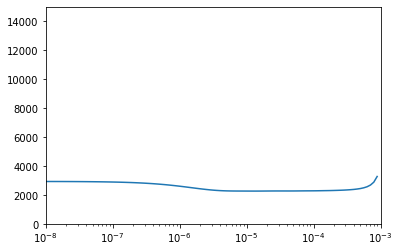

In [140]:
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 15000])

In [141]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

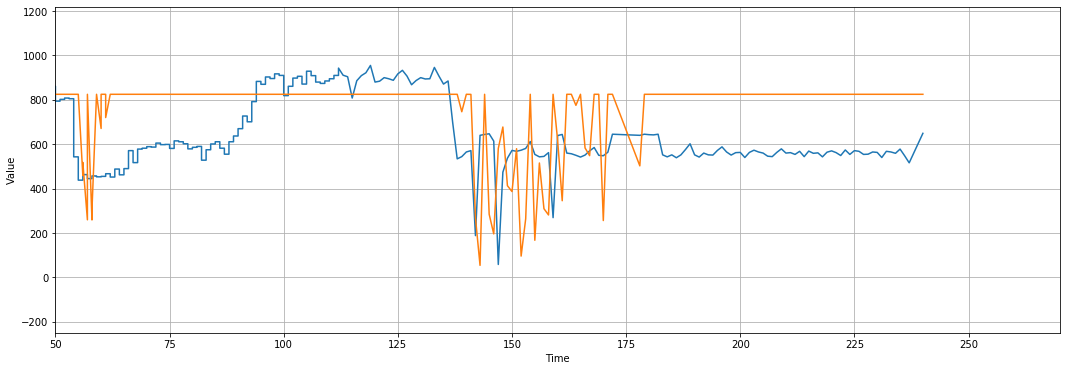

In [145]:
forecast = []

for time in range(len(series_new) - window_size):
    forecast.append(model.predict(series_new[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(18, 6))
plt.xlim(500)
plt.axis([50,270,-250,1220])

# plot_series(time_train, x_train)
plot_series(time_valid, x_valid)
plot_series(time_valid, results)


In [146]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

169.0345

In [30]:
# tst  = data.sort_values(by='timestamp').head(500)

In [ ]:
# tst.to_csv('tst.csv')